Install ultralytics package to import YOLO


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 8.5 MB/s eta 0:00:00


Import Yolo

In [2]:
from ultralytics import YOLO

YoloV8 model is used to detect the objects from an input image

In [5]:
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source='/input_image_kohli.jpg'

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients

image 1/1 /input_image_kohli.jpg: 448x640 1 person, 3 sports balls, 1 baseball bat, 94.3ms
Speed: 16.2ms preprocess, 94.3ms inference, 21.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Displaying the objects detected using pretrained model

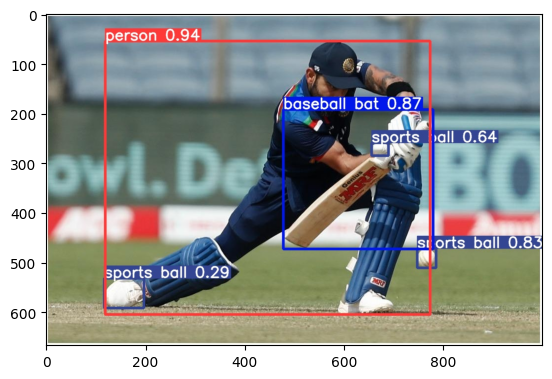

In [6]:
import matplotlib.pyplot as plt
img=plt.imread('/content/runs/detect/predict/input_image_kohli.jpg')
plt.imshow(img)

Training and developing the model with our custom dataset

In [7]:
!yolo task=detect mode=train model=yolov8l.pt data=../content/drive/MyDrive/corner_detection/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=../content/drive/MyDrive/corner_detection/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

Detecting the image with newly developed model

In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/input_image_kohli.jpg'

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients

image 1/1 /input_image_kohli.jpg: 448x640 1 top left, 1 top right, 1 bottom left, 1 bottom right, 220.2ms
Speed: 13.6ms preprocess, 220.2ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Displaying the output

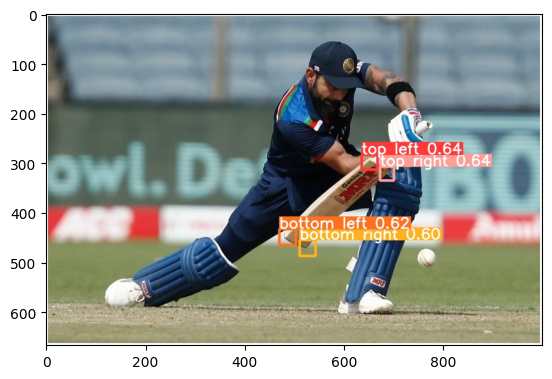

In [10]:
import matplotlib.pyplot as plt
img=plt.imread('/content/runs/detect/predict2/input_image_kohli.jpg')
plt.imshow(img)

Confusion matrix

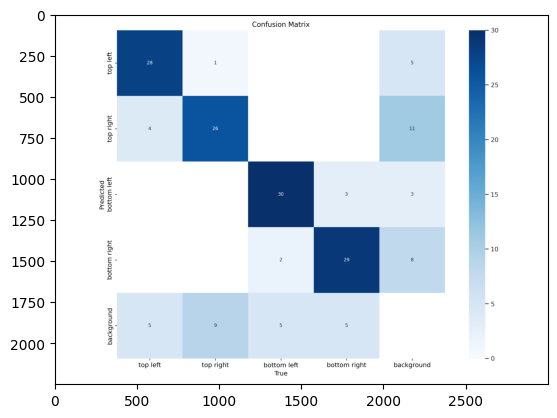

In [11]:
img=plt.imread('/content/runs/detect/train/confusion_matrix.png')
plt.imshow(img)

F1 Score - Confidence curve

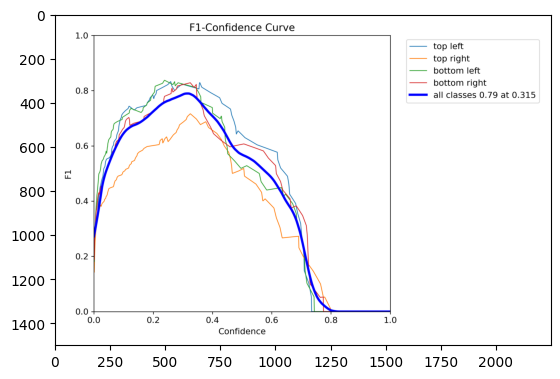

In [15]:
img=plt.imread('/content/runs/detect/train/F1_curve.png')
plt.imshow(img)